In [54]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [55]:
df=pd.read_csv('D:/aiml/Iris_data.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [56]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

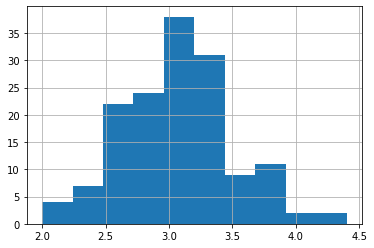

In [58]:
df['SepalWidthCm'].hist()

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [60]:
df['Species'] = le.fit_transform(df['Species']) 
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [61]:
from sklearn.model_selection import train_test_split 
x = df.drop(columns=['Species']) 
y = df['Species'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [62]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()

In [63]:
model.fit(x_train, y_train)
 

LogisticRegression()

In [64]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [65]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.utils import to_categorical

In [66]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1000)              5000      
                                                                 
 dense_25 (Dense)            (None, 500)               500500    
                                                                 
 dense_26 (Dense)            (None, 300)               150300    
                                                                 
 dropout_6 (Dropout)         (None, 300)               0         
                                                                 
 dense_27 (Dense)            (None, 3)                 903       
                                                                 
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [68]:
from keras.utils import to_categorical

In [69]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [70]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
6/6 [==============================] - 1s 58ms/step - loss: 1.0377 - accuracy: 0.5048 - val_loss: 0.5801 - val_accuracy: 0.7556
Epoch 2/10
6/6 [==============================] - 0s 18ms/step - loss: 0.6071 - accuracy: 0.6762 - val_loss: 0.3854 - val_accuracy: 0.9556
Epoch 3/10
6/6 [==============================] - 0s 17ms/step - loss: 0.4694 - accuracy: 0.7429 - val_loss: 0.3525 - val_accuracy: 0.7111
Epoch 4/10
6/6 [==============================] - 0s 20ms/step - loss: 0.3579 - accuracy: 0.8476 - val_loss: 0.2317 - val_accuracy: 0.8667
Epoch 5/10
6/6 [==============================] - 0s 18ms/step - loss: 0.3213 - accuracy: 0.8476 - val_loss: 0.1799 - val_accuracy: 0.9556
Epoch 6/10
6/6 [==============================] - 0s 20ms/step - loss: 0.2681 - accuracy: 0.8667 - val_loss: 0.2607 - val_accuracy: 0.8889
Epoch 7/10
6/6 [==============================] - 0s 18ms/step - loss: 0.2732 - accuracy: 0.8762 - val_loss: 0.0979 - val_accuracy: 0.9556
Epoch 8/10
6/6 [===========

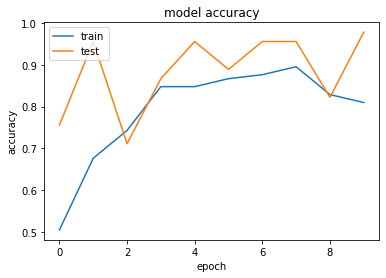

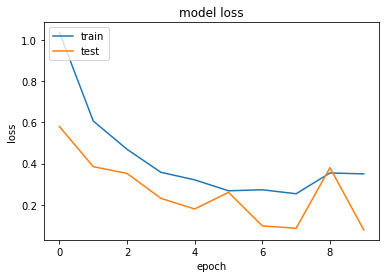

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()